# Testing qibo_qec Module

Basic imports and graphic settings:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')    # Use dark background for plots

import qibo
assert qibo.__version__ >= "0.2.20", "This script requires qibo version 0.2.20 or higher."

from qibo import Circuit, gates
from qibo.gates import *

from qibo.ui import plot_circuit, plot_density_hist, visualize_state

### Import QEC module ###
from qibo_qec import QEC


custom_style = {                    # Define a custom style for the circuit plot
    "facecolor" : "#000000",
    "edgecolor" : "#ffffff",
    "linecolor" : "#ffffff",
    "textcolor" : "#ffffff",
    "fillcolor" : "#c41b1b",
    "gatecolor" : "#9000ff",
    "controlcolor" : "#360000"
}

Basic Qibo Circuit creation:

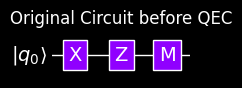

In [15]:
qc = Circuit(1)

qc.add(gates.X(0))
qc.add(gates.Z(0))

qc.add(gates.M(0))

plot_circuit(qc, style=custom_style)
plt.title("Original Circuit before QEC")
plt.show()

Application of Quantum Error Correction:

Initialized QEC with code type: bit_flip
Applying bit_flip code to a circuit with 5 qubit(s).


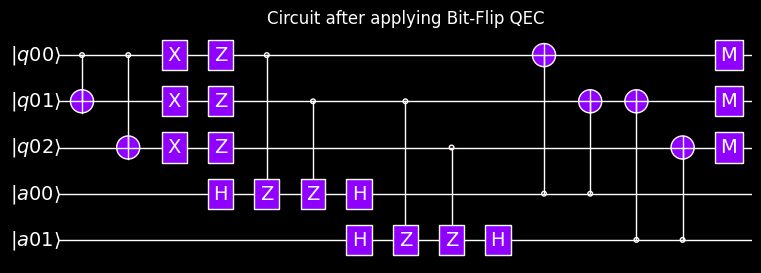

In [16]:
qec = QEC(code_type="bit_flip")
encoded_circuit = qec.apply_code(qc)

plot_circuit(encoded_circuit, style=custom_style)
plt.title("Circuit after applying Bit-Flip QEC")
plt.show()

[Qibo 0.2.21|INFO|2025-09-29 02:29:40]: Using qibojit (numba) backend on /CPU:0
[Qibo 0.2.21|INFO|2025-09-29 02:29:40]: Using qibojit (numba) backend on /CPU:0


(<Axes: xlabel='States', ylabel='Probabilities'>,
 <Figure size 750x500 with 1 Axes>)

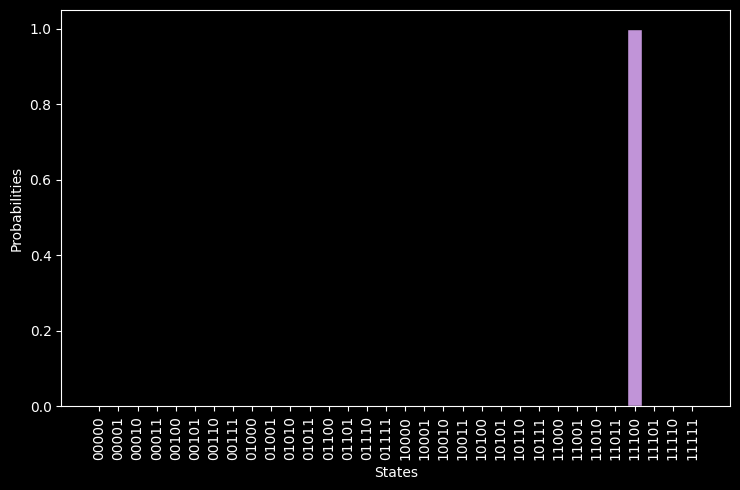

In [17]:
qibo.set_backend("qibojit")
qibo.set_device("/CPU:0")
qibo.set_threads(20)

res = encoded_circuit(nshots=10)
visualize_state(res)